In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)

# for graphing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

import xgboost
from xgboost import XGBRegressor

import lightgbm
from lightgbm import LGBMRegressor


/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


In [2]:
# get package versions
print('numpy version is: {}'.format(np.__version__))
print('pandas version is: {}'.format(pd.__version__))
print('matplotlib version is: {}'.format(matplotlib.__version__))
print('seaborn version is: {}'.format(sns.__version__))
print('scikit-learn version is: {}'.format(sklearn.__version__))
print('xgboost version is: {}'.format(xgboost.__version__))
print('lightgbm version is: {}'.format(lightgbm.__version__))



numpy version is: 2.0.2
pandas version is: 2.2.2
matplotlib version is: 3.10.0
seaborn version is: 0.13.2
scikit-learn version is: 1.6.1
xgboost version is: 3.1.0
lightgbm version is: 4.6.0


In [3]:
# read in the training data
train_df= pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

print(train_df.head())

print(train_df.shape)

   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments  IneffectiveDisasterP

all columns are numeric.  target is FloodProbability.  21 features.

In [4]:
# get info on train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

There are no nulls.  All columns are int except target.

In [5]:
# look at statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531782,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [6]:
train_col= sorted(train_df.columns.tolist())
skew_list= []

# function to plot histogram and boxplot
def hist_box_fn(df1, col1, bin1= None):
    fig0, ax0= plt.subplots(1, 2, figsize= (6, 3), gridspec_kw= {'width_ratios':[2, 1]})
    plt.suptitle(col1)
    plt.subplots_adjust(wspace= 0.5)
    # median line
    mid1= df1[col1].median()
    # average line
    avg1= np.mean(df1[col1])
    # skew 
    skew1= df1[col1].skew()
    skew_list.append(skew1)
    str1= 'skew:{}'.format(round(skew1, 2))
    # histogram formatting
    ax0[0].hist(df1[col1], bins= bin1)
    ax0[0].axvline(mid1, linewidth= 2, color= 'k', label= 'Median')
    ax0[0].axvline(avg1, linewidth= 2, color= 'green', label= 'Average')
    ax0[0].text(0, 0.9, str1,transform= ax0[0].transAxes)
    ax0[0].set_ylabel('Counts')
    ax0[0].set_xlabel(col1)
    ax0[0].legend(loc= 'upper right')
    # boxplot formatting
    ax0[1].boxplot(df1[col1])
    ax0[1].set_ylabel(col1)
    return fig0


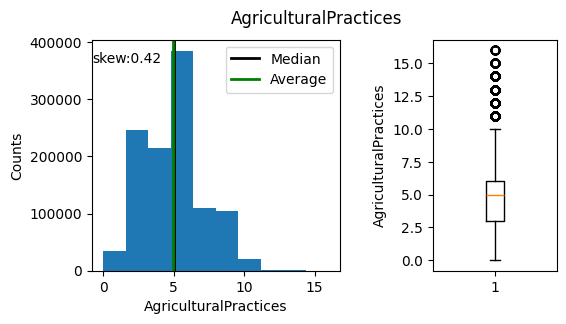

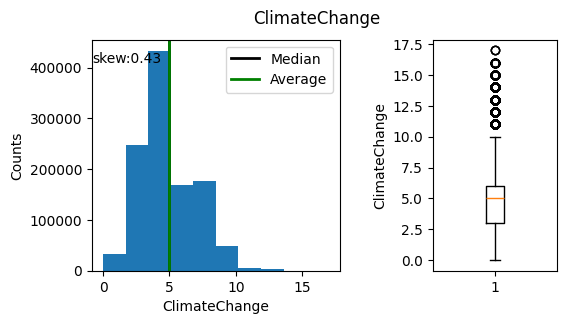

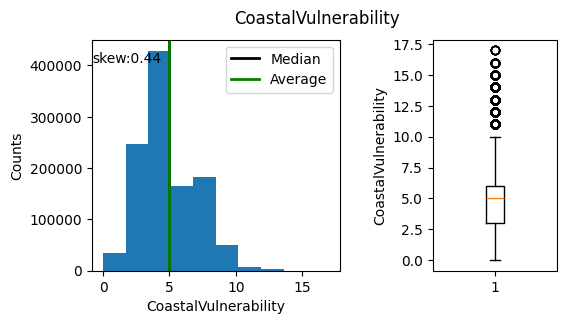

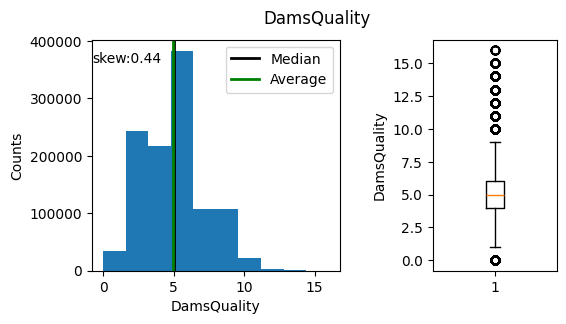

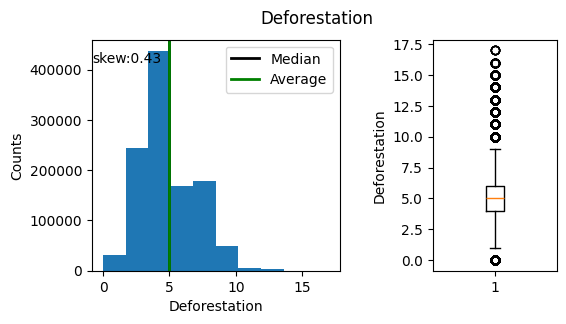

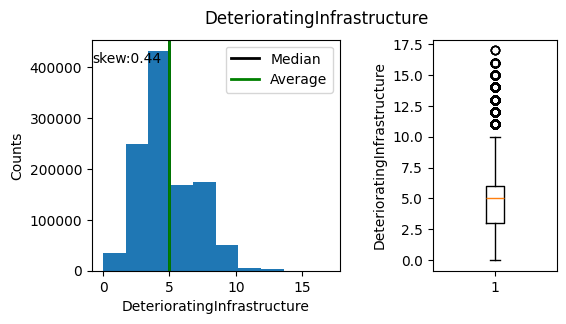

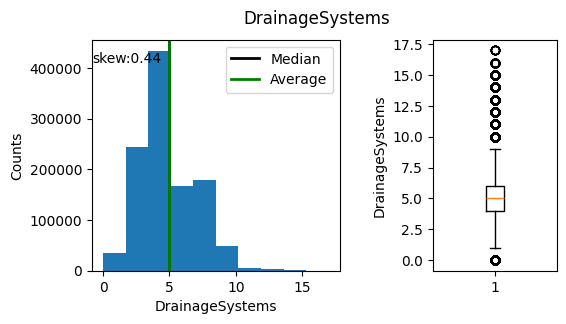

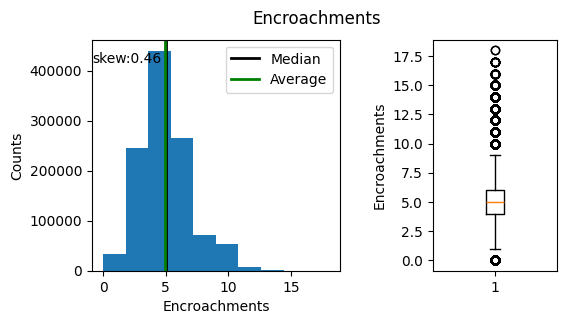

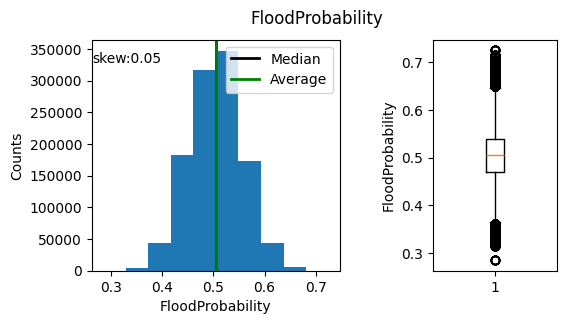

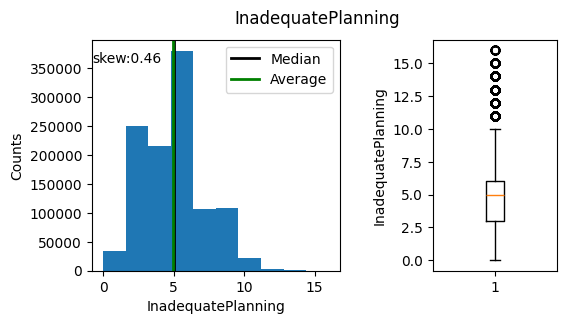

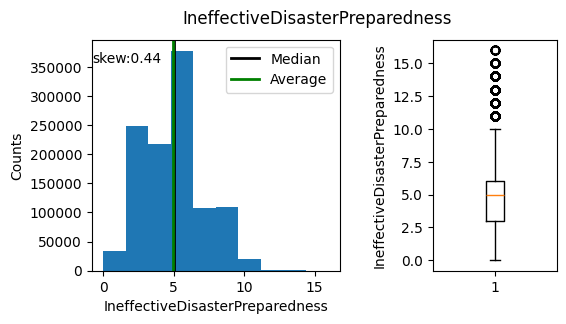

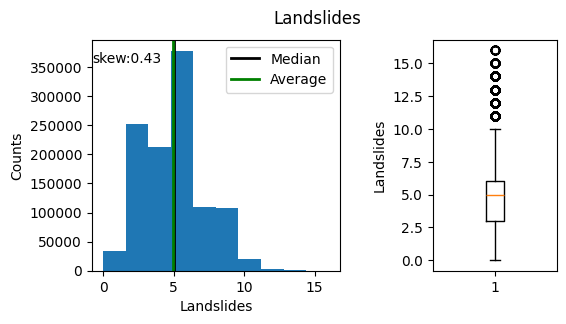

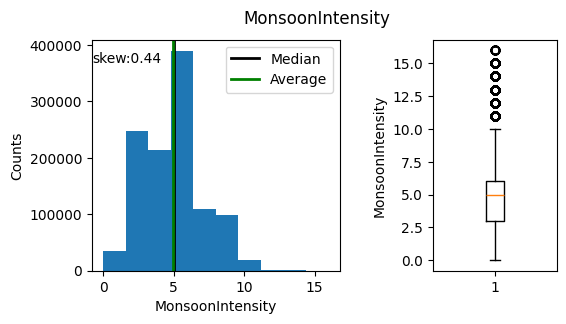

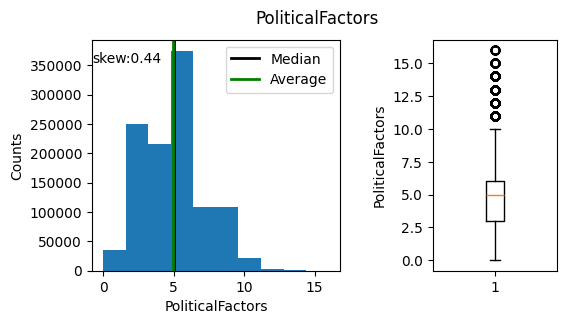

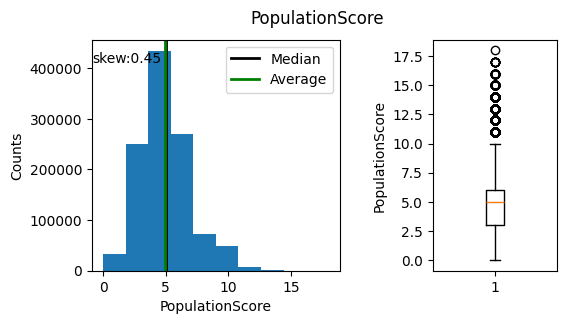

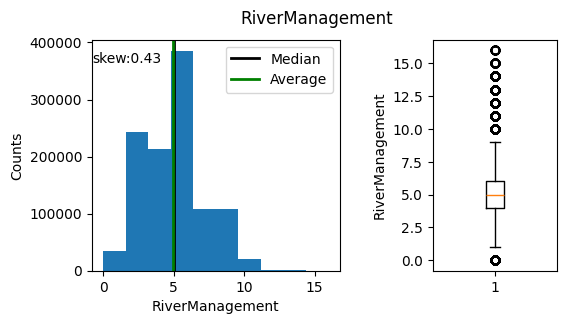

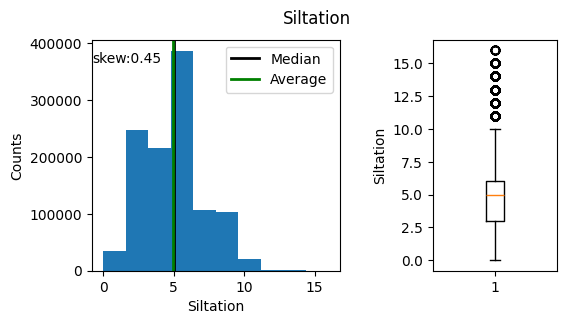

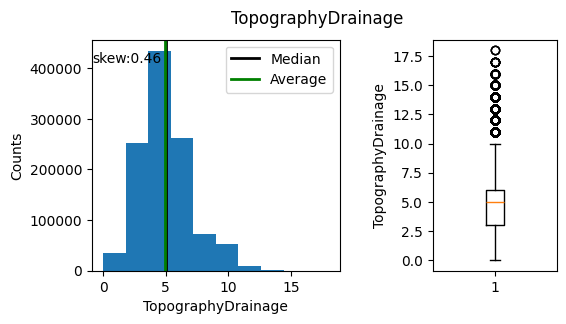

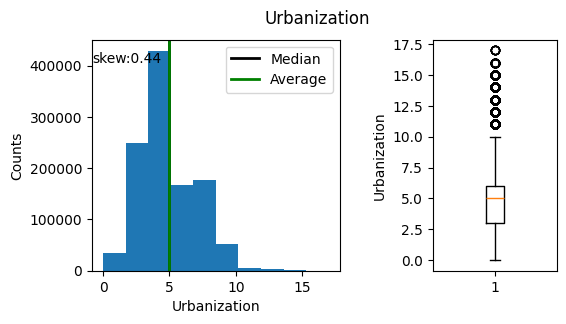

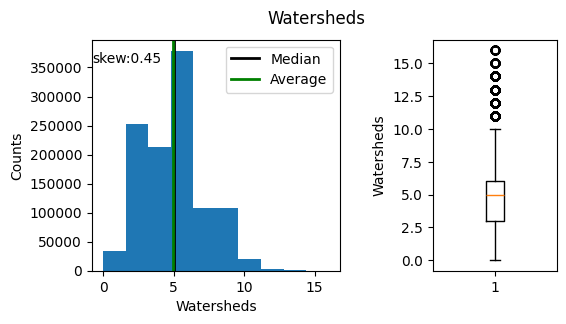

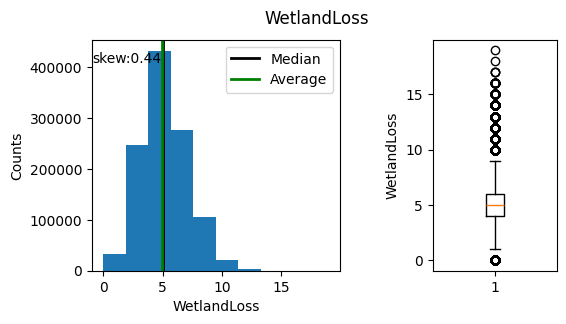

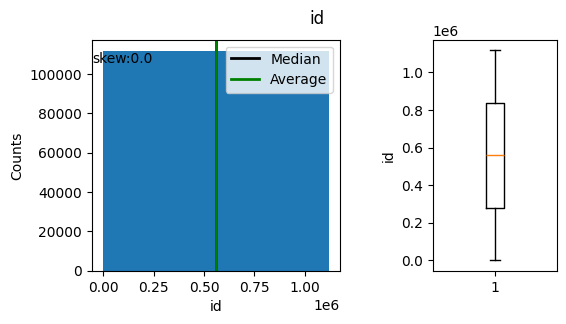

In [7]:
# graph histogram and boxplot for each column
for i in train_col:
    fig0= hist_box_fn(train_df, i)
    plt.pause(0.01)
    plt.close(fig0)


Except id, all features are roughly normal (have slight positive skew: 0.4 - 0.45).  All features expect id have outliers at high values.

/tmp/ipykernel_55/1484855631.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(coor_df.columns, fontsize= 14)
/tmp/ipykernel_55/1484855631.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(coor_df.columns, fontsize= 14)


<Axes: >

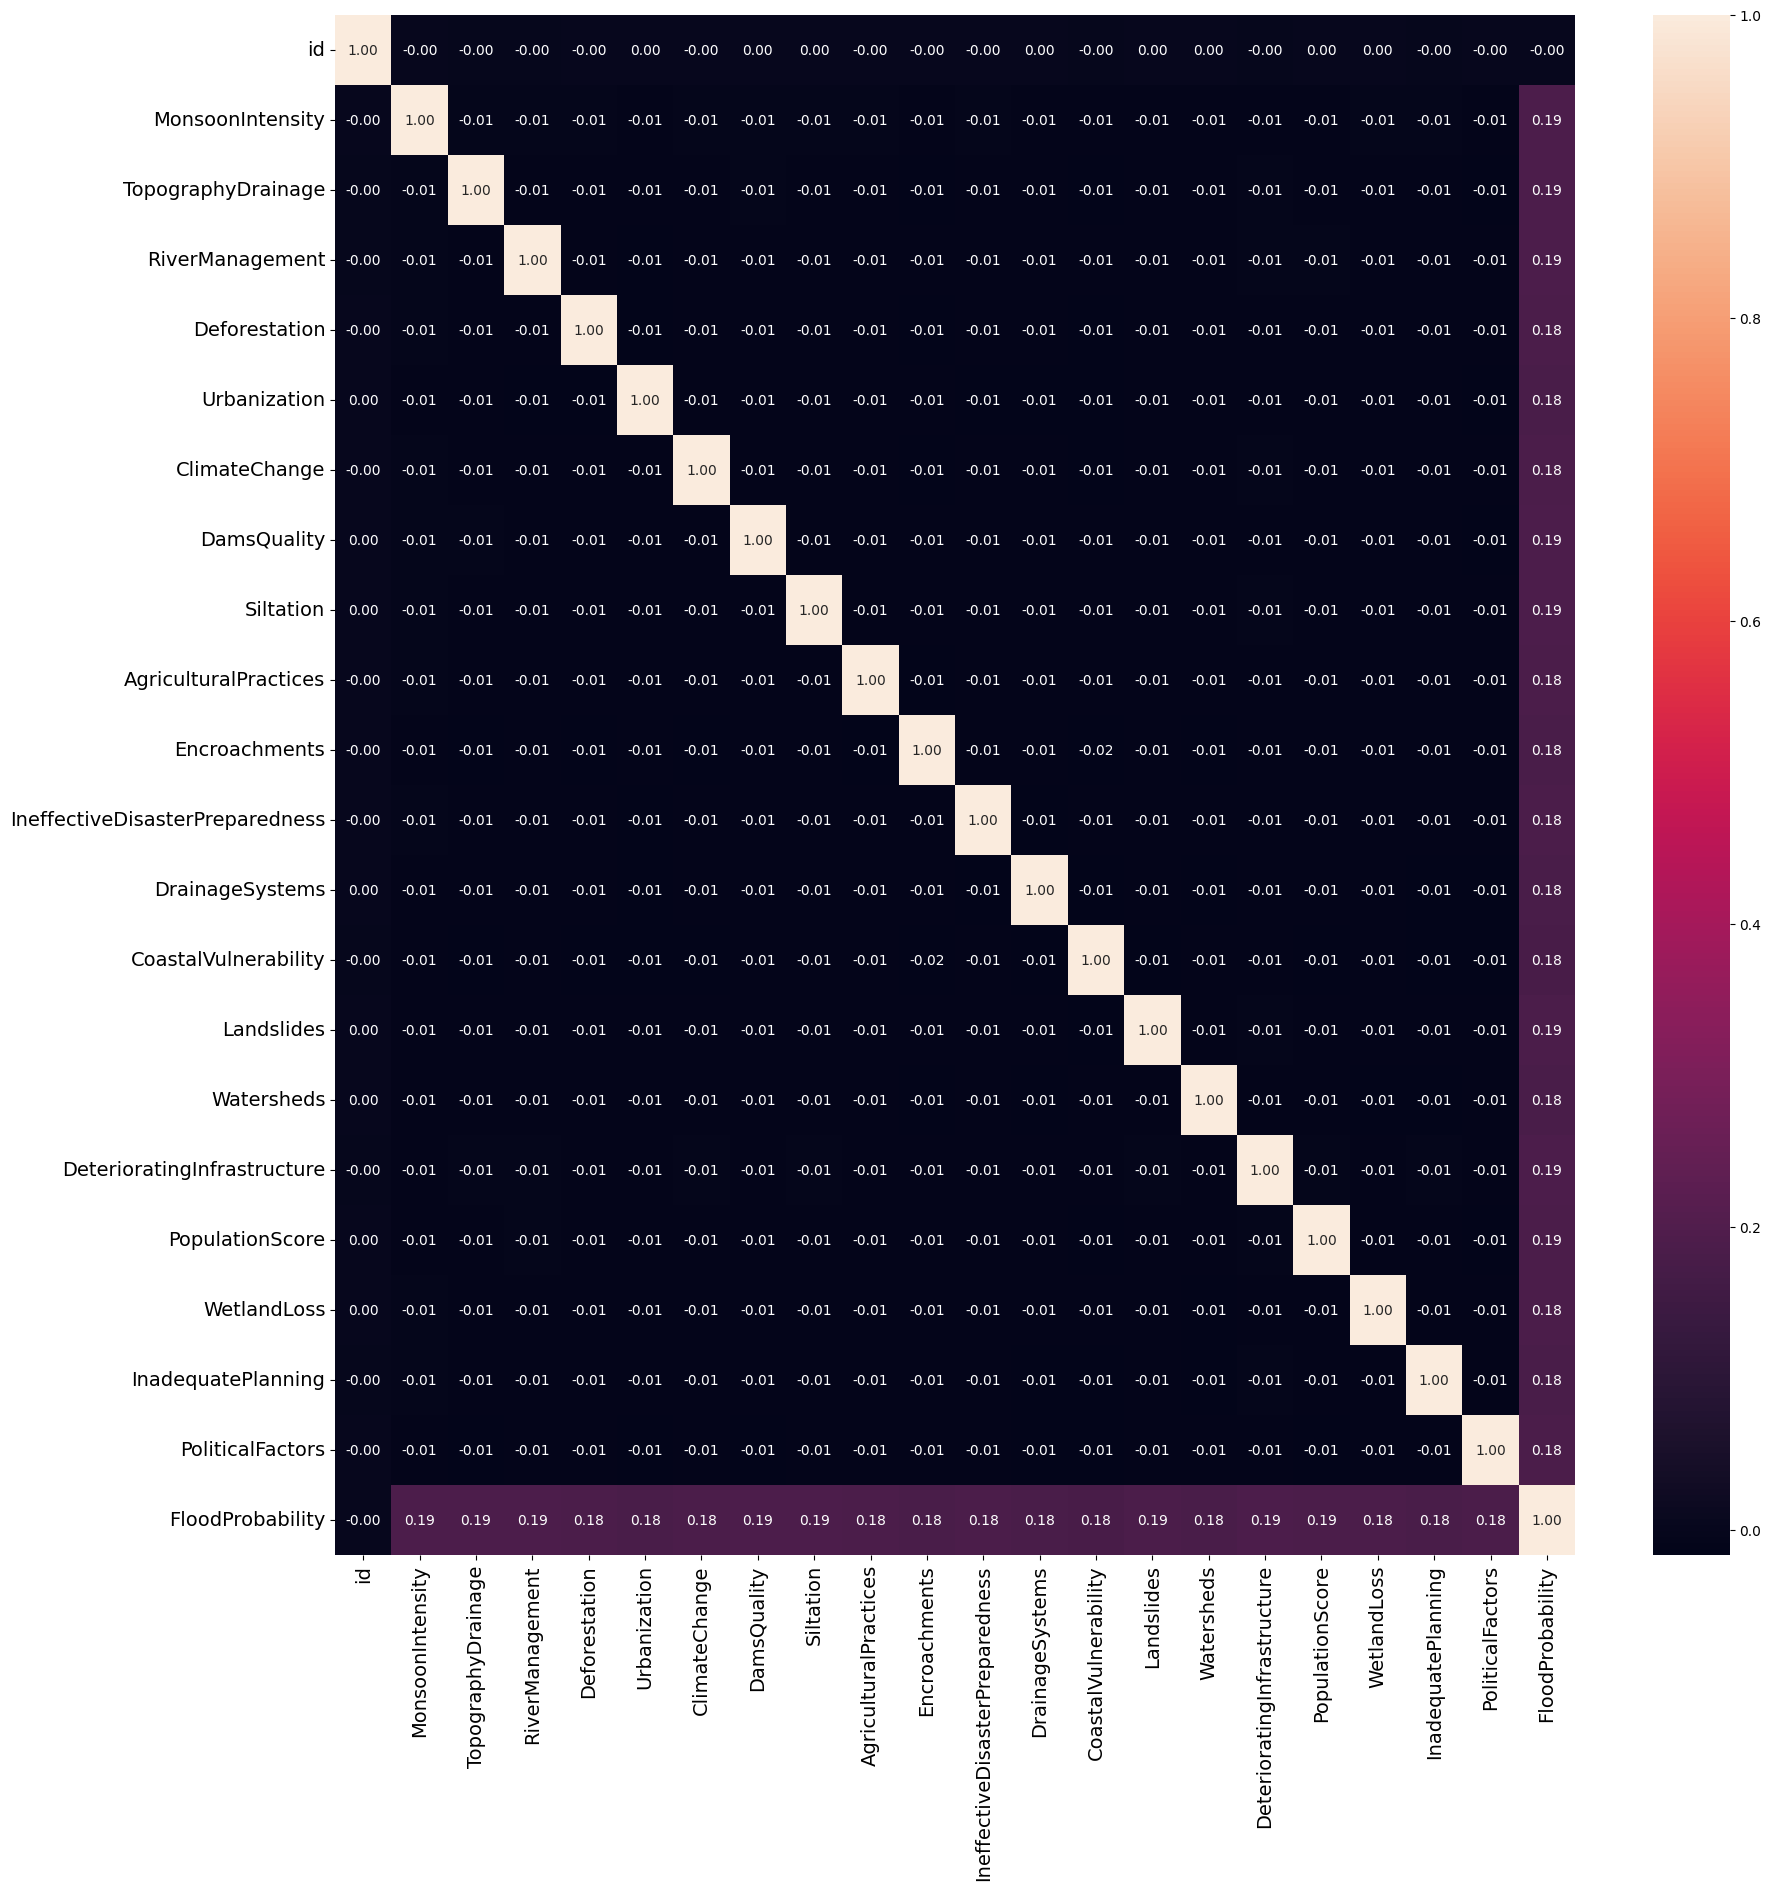

In [8]:
# make correlation map and look at heat map
coor_df= train_df.corr()

fig1= plt.figure(figsize= (20, 20))
ax1= plt.gca()
ax1.set_xticklabels(coor_df.columns, fontsize= 14)
ax1.set_yticklabels(coor_df.columns, fontsize= 14)
sns.heatmap(coor_df, annot= True, fmt= '0.2f')

no correlation between features.

In [9]:
# prepare data- drop id column
train_df1= train_df.drop(['id'], axis= 1)

# split into x and y
y_train= train_df1.loc[:, 'FloodProbability']
x_train= train_df1.drop(['FloodProbability'], axis= 1)


# look at new dataframes
print('shape of new x_train training is:{}'.format(x_train.shape))
print(x_train.head())

print('-'*80)
print('shape of new y_train is:{}'.format(y_train.shape))
print(y_train.head())

shape of new x_train training is:(1117957, 20)
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 5                   8                5              8   
1                 6                   7                4              4   
2                 6                   5                6              7   
3                 3                   4                6              5   
4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachment

In [10]:
# read in test data
test_df= pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

print(test_df.head())
print('shape of test df is: {}'.format(test_df.shape))

        id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0  1117957                 4                   6                3   
1  1117958                 4                   4                2   
2  1117959                 1                   3                6   
3  1117960                 2                   4                4   
4  1117961                 6                   3                2   

   Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0              5             6              7            8          7   
1              9             5              5            4          7   
2              5             7              2            4          6   
3              6             4              5            4          3   
4              4             6              4            5          5   

   AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
0                      8              4                               

In [11]:
# look for null
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

no null values in test dataset.

In [12]:
# drop id columns
test_id= test_df['id']
test_df= test_df.drop(['id'], axis= 1)

# check shape of dataframe
print('shape of test_df is: {}'.format(test_df.shape))

shape of test_df is: (745305, 20)


In [13]:
# function to add features

def new_feat(df1):
    df1['sum']= df1.sum(axis= 1)
    df1['max']= df1.max(axis= 1)
    df1['min']= df1.min(axis= 1)
    df1['q1']= df1.quantile(q= 0.25, axis= 1)
    df1['q3']= df1.quantile(q= 0.75, axis= 1)
    df1['mid']= df1.median(axis= 1)
    df1['avg']= df1.mean(axis= 1)
    return df1


# add new columns to training and test
x_train= new_feat(x_train)
test_df= new_feat(test_df)

# look at new dataframes
print(' new train dataframe shape is: {}'.format(x_train.shape))
print(x_train.head())

print('-'*80)
print(' new train dataframe shape is: {}'.format(test_df.shape))
print(test_df.head())

    

 new train dataframe shape is: (1117957, 27)
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 5                   8                5              8   
1                 6                   7                4              4   
2                 6                   5                6              7   
3                 3                   4                6              5   
4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments 

In [14]:
# empty series to store predictions
pred1= np.ones((train_df1.shape[0]))
pred1= pd.Series(pred1, name= 'ElasticNet')
pred2= np.ones((train_df1.shape[0]))
pred2= pd.Series(pred2, name= 'xgboost')
pred3= np.ones((train_df1.shape[0]))
pred3= pd.Series(pred3, name= 'lightgbm')
pred4= np.ones((train_df1.shape[0]))
pred4= pd.Series(pred4, name= 'neuralnet')
pred5= np.ones((train_df1.shape[0]))


In [15]:
# empty series to store test predictions
test1= np.zeros((test_df.shape[0]))
test1= pd.Series(test1, name= 'ElasticNet')
test2= np.zeros((test_df.shape[0]))
test2= pd.Series(test2, name= 'xgboost')
test3= np.zeros((test_df.shape[0]))
test3= pd.Series(test3, name= 'lightgbm')
test4= np.zeros((test_df.shape[0]))
test4= pd.Series(test4, name= 'neuralnet')
test5= np.zeros((test_df.shape[0]))


In [16]:
# make predictions using base models and use cross validation

# setup cross validation
cv5= KFold(n_splits= 5, random_state= 24, shuffle= True)

# loop through folds
for train_idx, val_idx in cv5.split(x_train, y_train):
    xtrain, xval= x_train.iloc[train_idx, :], x_train.iloc[val_idx, :]
    ytrain, yval= y_train.iloc[train_idx], y_train.iloc[val_idx]

    # model 1- ElasticNet
    enet1= ElasticNet(alpha= 0.005)
    enet1.fit(xtrain, ytrain)
    pred1.iloc[val_idx]= enet1.predict(xval)
    # make val pred for model 1
    val_pred1= (enet1.predict(test_df))/cv5.n_splits
    val_pred1= pd.Series(val_pred1, name= 'test1')
    test1= test1 + val_pred1
    print('model 1 r2 score: {}'.format(round(r2_score(yval, pred1.iloc[val_idx]), 3)))

    # model 2- MLPRegressor
    nn1= MLPRegressor(random_state= 24, hidden_layer_sizes= (100, 50, 20), solver= 'adam', activation= 'relu')
    nn1.fit(xtrain, ytrain)
    pred2.iloc[val_idx]= nn1.predict(xval)
    # make val pred for model 2
    val_pred2= (nn1.predict(test_df))/cv5.n_splits
    val_pred2= pd.Series(val_pred2, name= 'test2')
    test2= test2 + val_pred2
    print('model 2 r2 score: {}'.format(round(r2_score(yval, pred2.iloc[val_idx]), 3)))
    
    # model 3- XGBoost
    boost1= XGBRegressor(random_state= 24)
    boost1.fit(xtrain, ytrain)
    pred3.iloc[val_idx]= boost1.predict(xval)
    # make val pred for model 3
    val_pred3= (boost1.predict(test_df))/cv5.n_splits
    val_pred3= pd.Series(val_pred3, name= 'test3')
    test3= test3 + val_pred3
    print('model 3 r2 score: {}'.format(round(r2_score(yval, pred3.iloc[val_idx]), 3)))

    # model 4- LightGBM
    light1= LGBMRegressor(objective= 'regression', random_state= 24, verbose= -1)
    light1.fit(xtrain, ytrain)
    pred4.iloc[val_idx]= light1.predict(xval)
    # make val pred for model 4
    val_pred4= (light1.predict(test_df))/cv5.n_splits
    val_pred4= pd.Series(val_pred4, name= 'test4')
    test4= test4 + val_pred4
    print('model 4 r2 score: {}'.format(round(r2_score(yval, pred4.iloc[val_idx]), 3)))



model 1 r2 score: 0.845
model 2 r2 score: 0.841
model 3 r2 score: 0.868
model 4 r2 score: 0.868
model 1 r2 score: 0.846
model 2 r2 score: 0.846
model 3 r2 score: 0.869
model 4 r2 score: 0.869
model 1 r2 score: 0.844
model 2 r2 score: 0.833
model 3 r2 score: 0.867
model 4 r2 score: 0.868
model 1 r2 score: 0.845
model 2 r2 score: 0.845
model 3 r2 score: 0.867
model 4 r2 score: 0.868
model 1 r2 score: 0.845
model 2 r2 score: 0.848
model 3 r2 score: 0.867
model 4 r2 score: 0.868


base models: ElasticNet, XGBRegressor, LGBMRegressor, MLPRegressor

In [17]:
# concatenate the predictions

# array with predictions from base models
base_pred= pd.concat([pred1, pred2, pred3, pred4], axis= 1)

In [18]:
# concatenate the test predictions

# array with predictions from base models
base_test_pred= pd.concat([test1, test2, test3, test4], axis= 1)

In [19]:
# linear regression meta model with cross validation

k5= KFold(n_splits= 5, shuffle= True, random_state= 24)

# empty series to hold predictions
test_pred= np.zeros((x_train.shape[0]))
test_pred= pd.Series(test_pred, name= 'test_pred')
y_test_pred= np.zeros((test_df.shape[0]))
y_test_pred= pd.Series(y_test_pred, name= 'FloodProbability')

# cross validation with meta model: linear regression
for train_id, val_id in k5.split(base_pred, y_train):
    xtrain2, xval2= base_pred.iloc[train_id, :], base_pred.iloc[val_id, :]
    ytrain2, yval2= y_train.iloc[train_id], y_train.iloc[val_id]

    # meta model
    linreg= LinearRegression()
    linreg.fit(xtrain2, ytrain2)
    test_pred.iloc[val_id]= linreg.predict(xval2)
    # final predictions
    y_test_pred1= (linreg.predict(base_test_pred))/cv5.n_splits
    y_test_pred1= pd.Series(y_test_pred1, name= 'FloodProbability')
    y_test_pred= y_test_pred + y_test_pred1
    print('meta model r2 score: {}'.format(round(r2_score(yval2, test_pred.iloc[val_id]), 3)))


y_test_pred= pd.Series(y_test_pred, name= 'FloodProbability')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


meta model r2 score: 0.868
meta model r2 score: 0.869


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


meta model r2 score: 0.868
meta model r2 score: 0.868
meta model r2 score: 0.868


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:

y_test_pred= pd.concat([test_id, y_test_pred], axis= 1)

# send to competition
y_test_pred.to_csv('/kaggle/working/submission.csv', index= False)